In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

In [183]:
train_df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')


In [184]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [185]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [186]:
print(train_df.shape)
print(test_df.shape)

(8693, 14)
(4277, 13)


In [187]:
#Checking Duplicates
print("Duplicates in Training Data")
print((train_df.duplicated().sum()),(100*train_df.duplicated().sum()/len(train_df)))
print("Duplicates in Test Data")
print((test_df.duplicated().sum()),(100*test_df.duplicated().sum()/len(test_df)))

Duplicates in Training Data
0 0.0
Duplicates in Test Data
0 0.0


In [188]:
print("Data types of Training Data")
print(train_df.dtypes)
print("*"*100)
print("\n")
print("Data types of Testing Data")
print(test_df.dtypes)

Data types of Training Data
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
****************************************************************************************************


Data types of Testing Data
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [189]:
df1=(train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:'No of Missing Values'})
df1['% of Missing Values']=round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1.sort_values(by=['% of Missing Values'],ascending=False,inplace=True)
df1


,No of Missing Values,% of Missing Values
CryoSleep,217,2.50
ShoppingMall,208,2.39
VIP,203,2.34
HomePlanet,201,2.31
Name,200,2.30
Cabin,199,2.29
VRDeck,188,2.16
FoodCourt,183,2.11
Spa,183,2.11
Destination,182,2.09


In [190]:
df2=(test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:'No of Missing Values'})
df2['% of Missing Values']=round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2)
df2.sort_values(by=['% of Missing Values'],ascending=False,inplace=True)
df2

,No of Missing Values,% of Missing Values
FoodCourt,106,2.48
Spa,101,2.36
Cabin,100,2.34
ShoppingMall,98,2.29
Name,94,2.20
CryoSleep,93,2.17
VIP,93,2.17
Destination,92,2.15
Age,91,2.13
HomePlanet,87,2.03


In [191]:
#Checking Cardinality of Categorical Columns
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


EDA

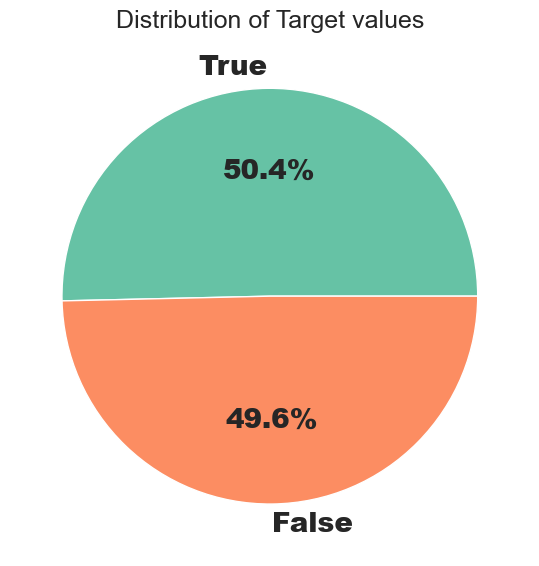

In [192]:
plt.figure(figsize = (10,6))
plt.pie(train_df['Transported'].value_counts(),labels=train_df['Transported'].value_counts().keys(),autopct="%1.1f%%",textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Distribution of Target values")
plt.tight_layout()
plt.show()

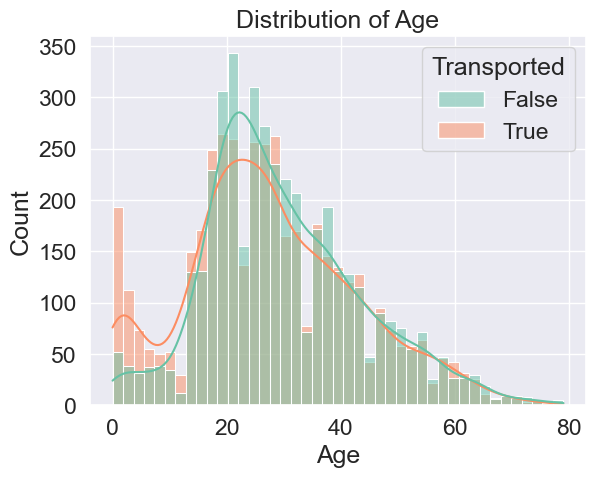

In [193]:
#Distribution of Age feature
sns.histplot(x=train_df['Age'],data=train_df,kde=True,hue="Transported",palette="Set2")
plt.title("Distribution of Age")
plt.show()

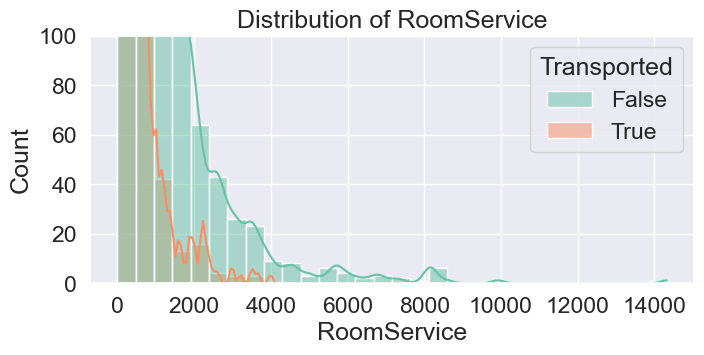

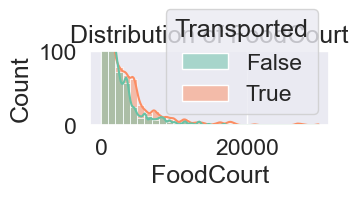

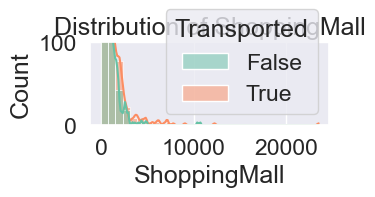

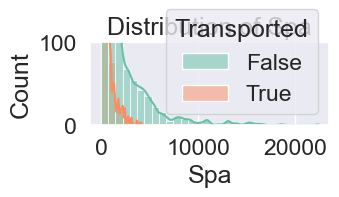

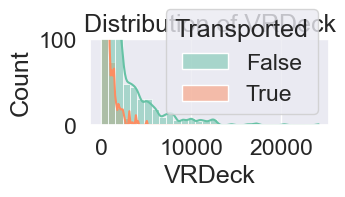

In [194]:
#Visualising All Expenditure features
exp_cols=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
plt.figure(figsize = (14,10))
for idx, column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column,data=train_df,kde=True,hue="Transported",bins=30,palette="Set2")
    plt.title(f"Distribution of {column}")
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()


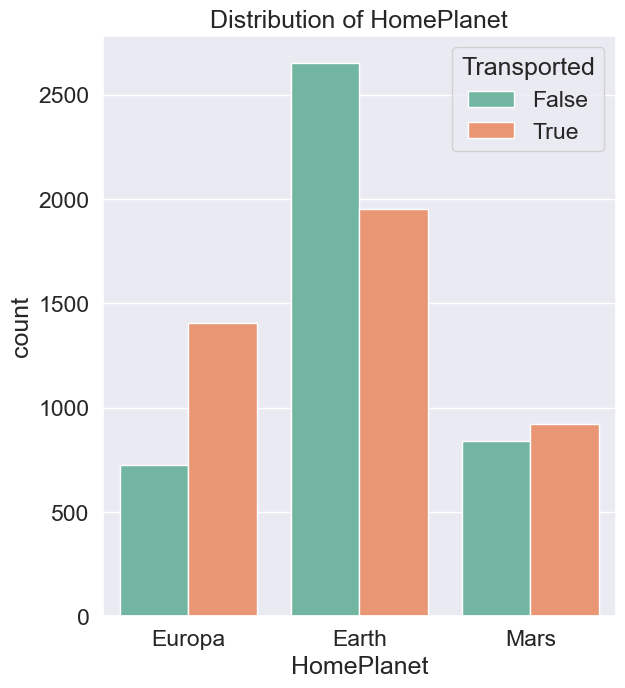

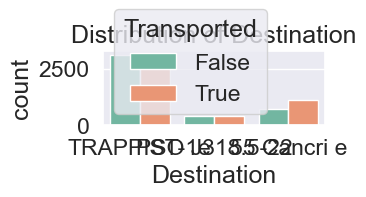

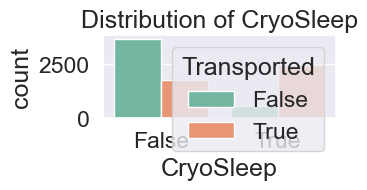

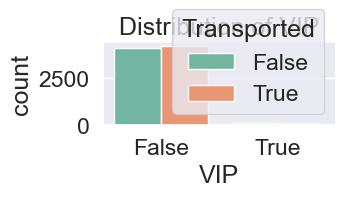

In [195]:
#Visualising Categorical features
cat_cols=["HomePlanet","Destination","CryoSleep","VIP"]
plt.figure(figsize = (12,20))
for idx, column in enumerate(cat_cols):
    plt.subplot(3,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    plt.show()


In [196]:
#Feature Engineering
def passengerid_new_features(df):
    df['Group']=df['PassengerId'].apply(lambda x:x.split("_")[0])
    df['Member']=df['PassengerId'].apply(lambda x:x.split("_")[1])
    x=df.groupby("Group")["Member"].count().sort_values()
    y=set(x[x>1].index)
    df["Travelling_Solo"]=df["Group"].apply(lambda x:x not in y)
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]




In [197]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [198]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

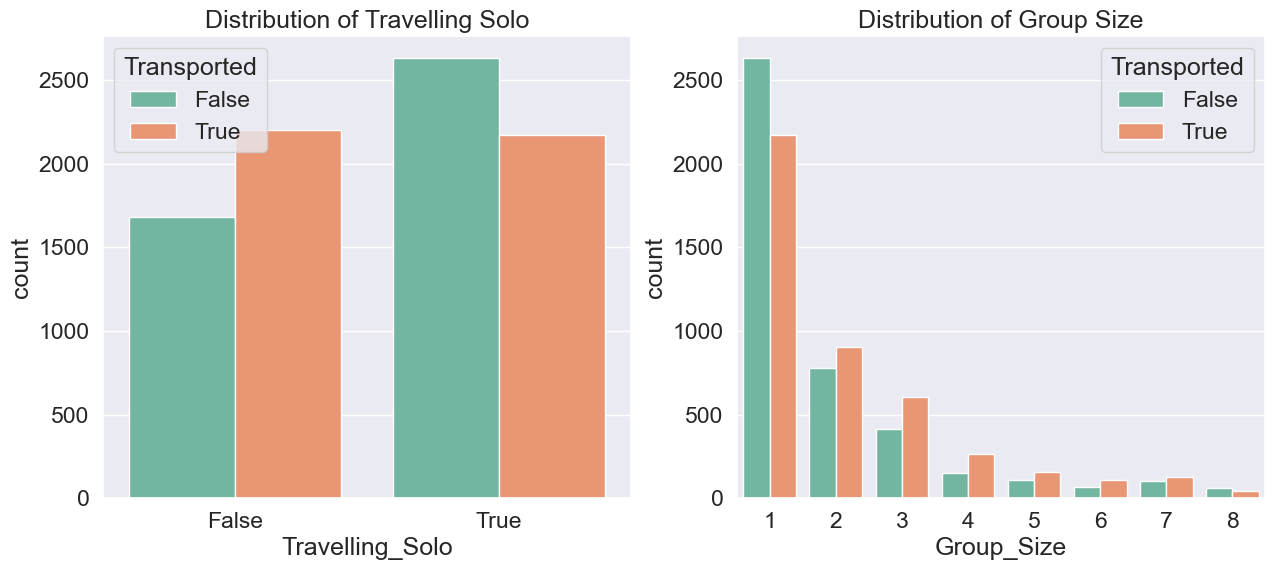

In [199]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x="Travelling_Solo",hue="Transported",data=train_df,palette="Set2")
plt.title("Distribution of Travelling Solo")

plt.subplot(1,2,2)
sns.countplot(x="Group_Size",hue="Transported",data=train_df,palette="Set2")
plt.title("Distribution of Group Size")
plt.show()



In [200]:
#Create new feature based on cabin
train_df["Cabin"].to_frame().head()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [201]:
def cabin_new_feature(df):

    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories

    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])

    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)

    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df['Cabin_Number']=pd.to_numeric(df['Cabin_Number'],errors='coerce')
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)








In [202]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

In [203]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8693 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  Travelling_Solo  8693 non-null   bool   
 15  Group_Size       8693 non-null   int64  
 16  Cabin_Deck       8693 non-null   object 
 17  Cabin_Number  

In [204]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      4277 non-null   object 
 1   HomePlanet       4190 non-null   object 
 2   CryoSleep        4184 non-null   object 
 3   Cabin            4277 non-null   object 
 4   Destination      4185 non-null   object 
 5   Age              4186 non-null   float64
 6   VIP              4184 non-null   object 
 7   RoomService      4195 non-null   float64
 8   FoodCourt        4171 non-null   float64
 9   ShoppingMall     4179 non-null   float64
 10  Spa              4176 non-null   float64
 11  VRDeck           4197 non-null   float64
 12  Name             4183 non-null   object 
 13  Travelling_Solo  4277 non-null   bool   
 14  Group_Size       4277 non-null   int64  
 15  Cabin_Deck       4277 non-null   object 
 16  Cabin_Number     4277 non-null   float64
 17  Cabin_Side    

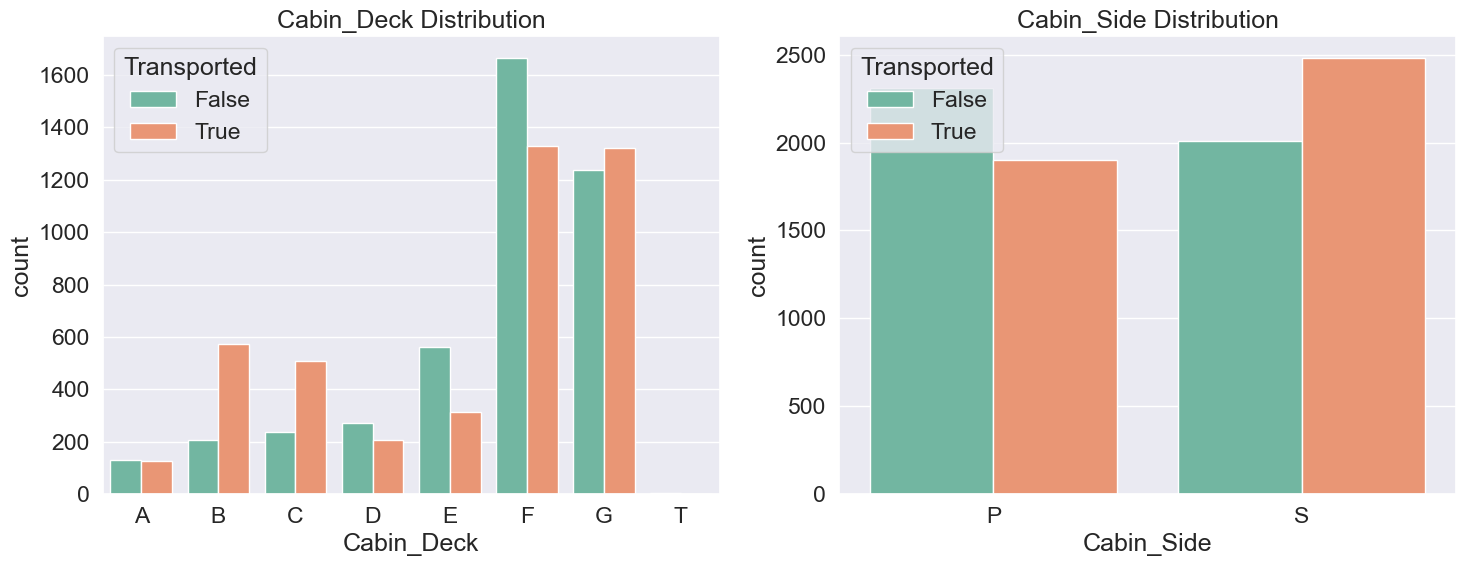

In [205]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()


In [206]:
print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())


Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0.0
The Maximum value of Cabin_number Feature is: 1894.0


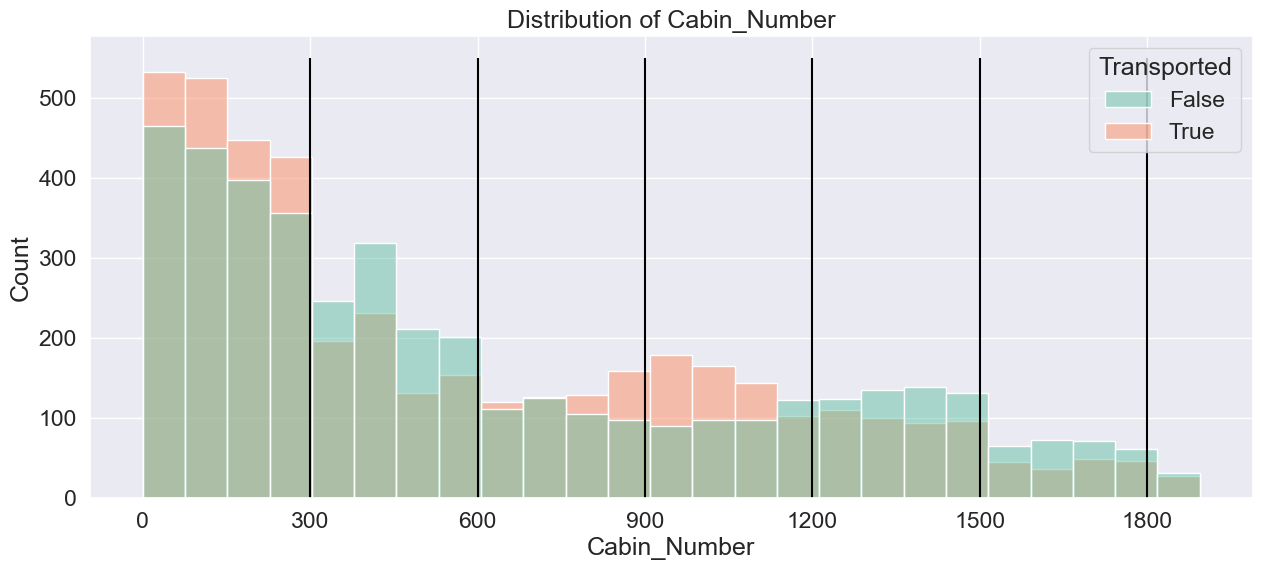

In [207]:
plt.figure(figsize=(15,6))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Distribution of Cabin_Number")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color='black')
plt.vlines(600,ymin=0,ymax=550,color='black')
plt.vlines(900,ymin=0,ymax=550,color='black')
plt.vlines(1200,ymin=0,ymax=550,color='black')
plt.vlines(1500,ymin=0,ymax=550,color='black')
plt.vlines(1800,ymin=0,ymax=550,color='black')
plt.show()

In [208]:
def cabin_regions(df):
    df['Cabin_Region1']=(df['Cabin_Number']<300)
    df['Cabin_Region2']=(df['Cabin_Number']>=300) & (df['Cabin_Number']<600)
    df['Cabin_Region3']=(df['Cabin_Number']>=600) & (df['Cabin_Number']<900)
    df['Cabin_Region4']=(df['Cabin_Number']>=900) & (df['Cabin_Number']<1200)
    df['Cabin_Region5']=(df['Cabin_Number']>=1200) & (df['Cabin_Number']<1500)
    df['Cabin_Region6']=(df['Cabin_Number']>=1500)

In [209]:
cabin_regions(train_df)
cabin_regions(test_df)

In [210]:
train_df.drop('Cabin_Number',axis=1,inplace=True)
test_df.drop('Cabin_Number',axis=1,inplace=True)

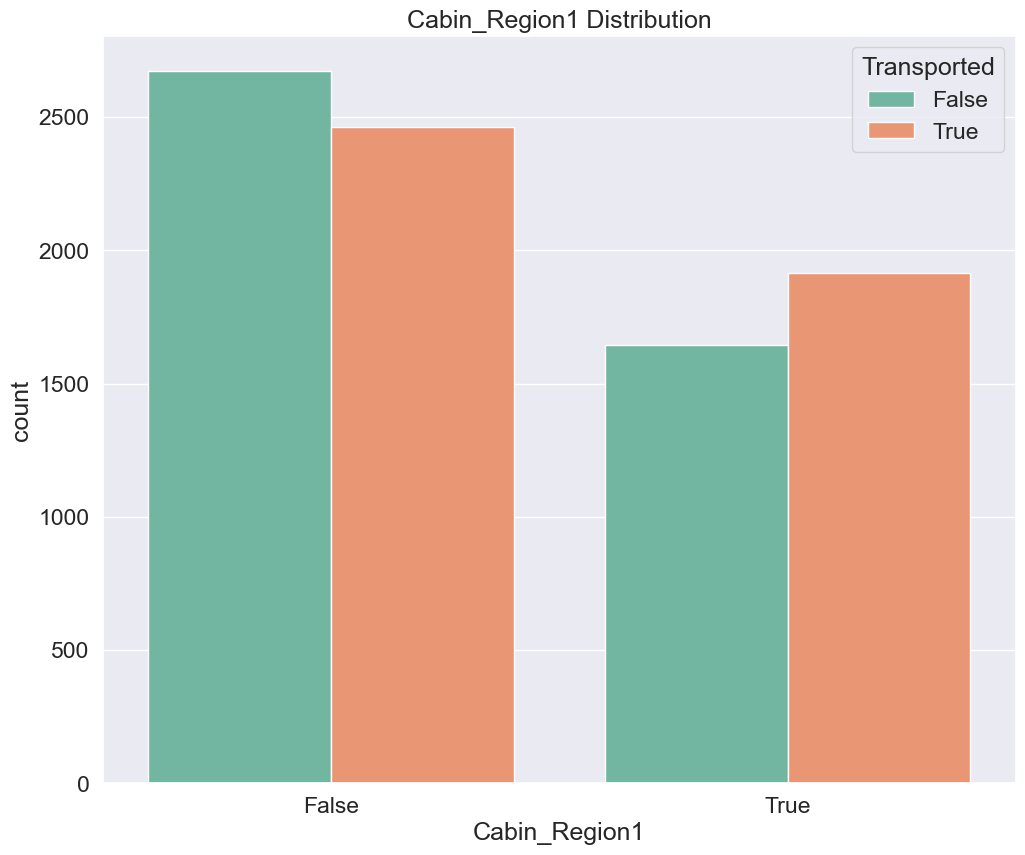

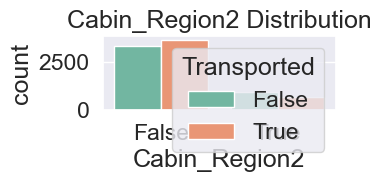

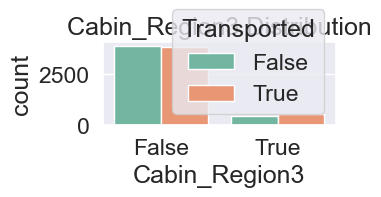

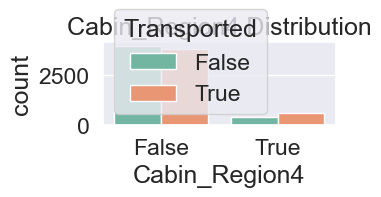

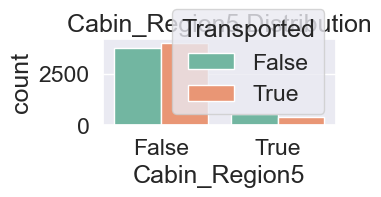

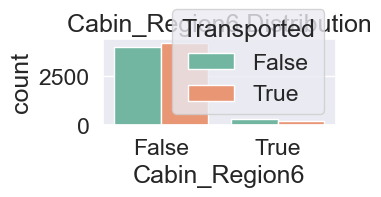

In [211]:
cols=["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]
plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(3,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()
    plt.show()




In [212]:
def create_age_group(df):
    age_group=[]
    for i in df['Age']:
        if i<=12:
            age_group.append("Age_0-12")
        elif i>12 and i<=18:
            age_group.append("Age_12-18")
        elif i>18 and i<=25:
            age_group.append("Age_19-25")
        elif i>25 and i<=32:
            age_group.append("Age_26-32")
        elif i>32 and i<=50:
            age_group.append("Age_33-50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
    df['Age_group']=age_group


In [213]:
create_age_group(train_df)
create_age_group(test_df)

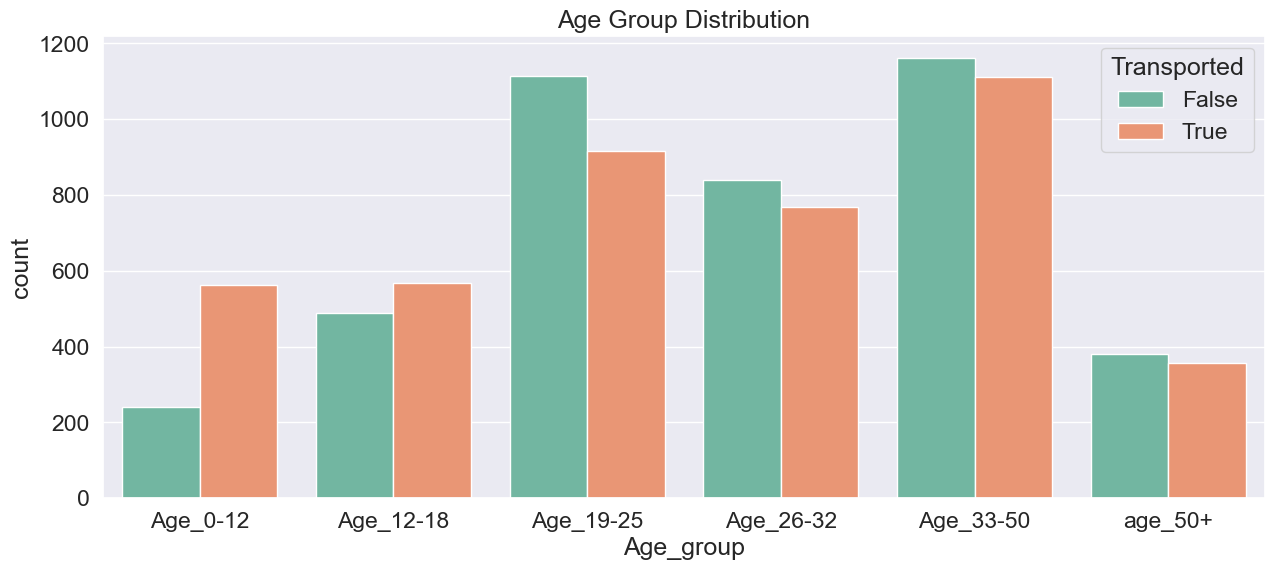

In [214]:
order=sorted(train_df['Age_group'].value_counts().keys().to_list())
plt.figure(figsize=(15,6))
sns.countplot(x='Age_group',hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Age Group Distribution")
plt.show()

In [215]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [216]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
def new_exp_features(df):
    df['Total_Expenditure']=df[exp_cols].sum(axis=1)
    df['No Spending']=(df['Total_Expenditure']==0)

In [217]:
new_exp_features(train_df)
new_exp_features(test_df)

In [218]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age_group,Total_Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,age_50+,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_33-50,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_12-18,1091.0,False


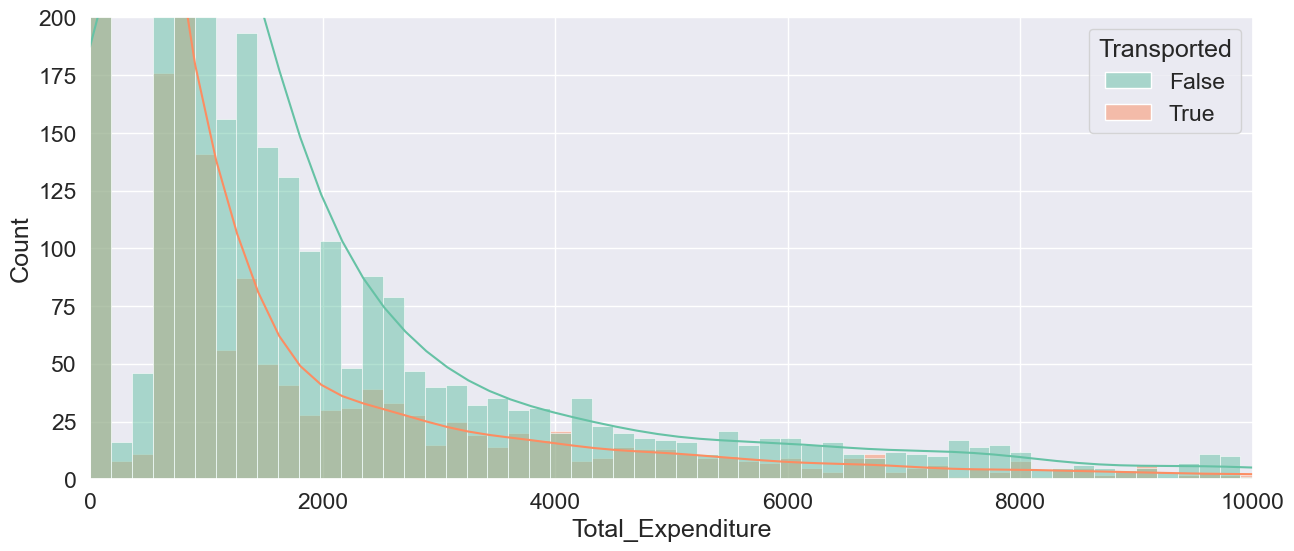

In [219]:
plt.figure(figsize=(15,6))
sns.histplot(x='Total_Expenditure',data=train_df,hue="Transported",palette="Set2",kde=True,bins=200)
plt.xlim(0,10000)
plt.ylim(0,200)
plt.show()

In [220]:
mean=round(train_df['Total_Expenditure'].mean())
print(f"The mean of Total Expenditure is: {mean}")
median=train_df['Total_Expenditure'].median()
print(f"The median of Total Expenditure is: {median}")

The mean of Total Expenditure is: 1441
The median of Total Expenditure is: 716.0


In [221]:
def Total_Category_Expenditure(df):
    expenditure_category=[]
    for i in df['Total_Expenditure']:
        if i==0:
            expenditure_category.append("No Expense")
        elif (i >0 and i<=716):
            expenditure_category.append("Low Expense")
        elif (i >716 and i<=1441):
            expenditure_category.append("Medium Expense")
        elif (i >1441):
            expenditure_category.append("High Expense")
    df['Expenditure_category']=expenditure_category


In [222]:
Total_Category_Expenditure(train_df)
Total_Category_Expenditure(test_df)

In [223]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age_group,Total_Expenditure,No Spending,Expenditure_category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,age_50+,10383.0,False,High Expense
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,S,True,False,False,False,False,False,Age_33-50,5176.0,False,High Expense
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,S,True,False,False,False,False,False,Age_12-18,1091.0,False,Medium Expense


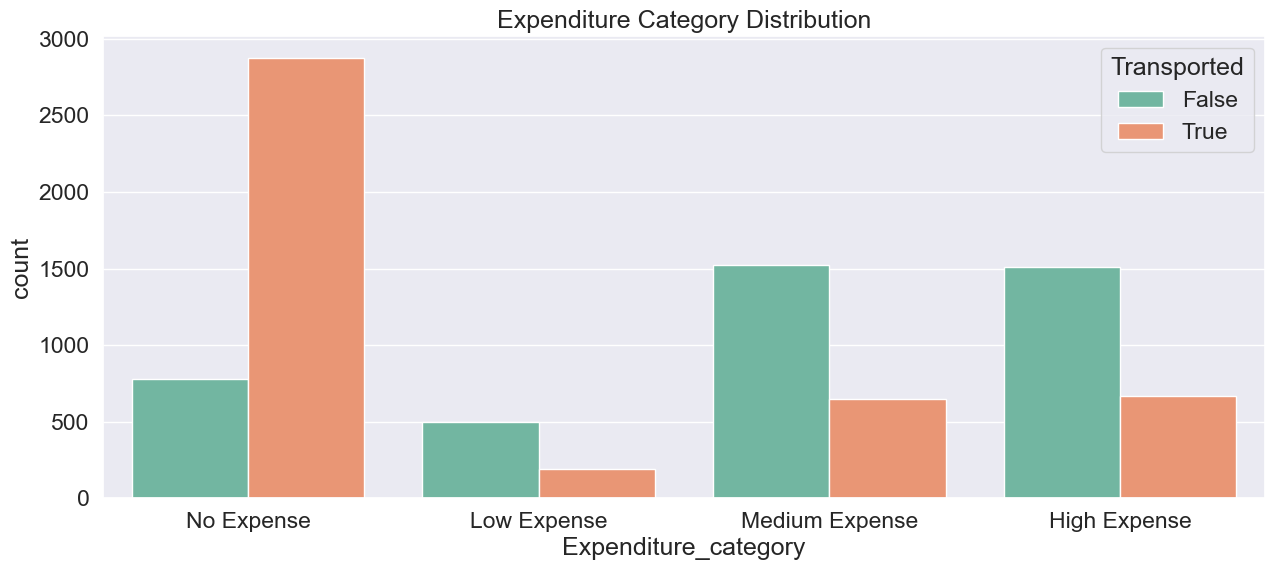

In [224]:
plt.figure(figsize=(15,6))
order=['No Expense','Low Expense','Medium Expense','High Expense']
sns.countplot(x='Expenditure_category',hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Expenditure Category Distribution")
plt.show()

In [225]:
import missingno as msno

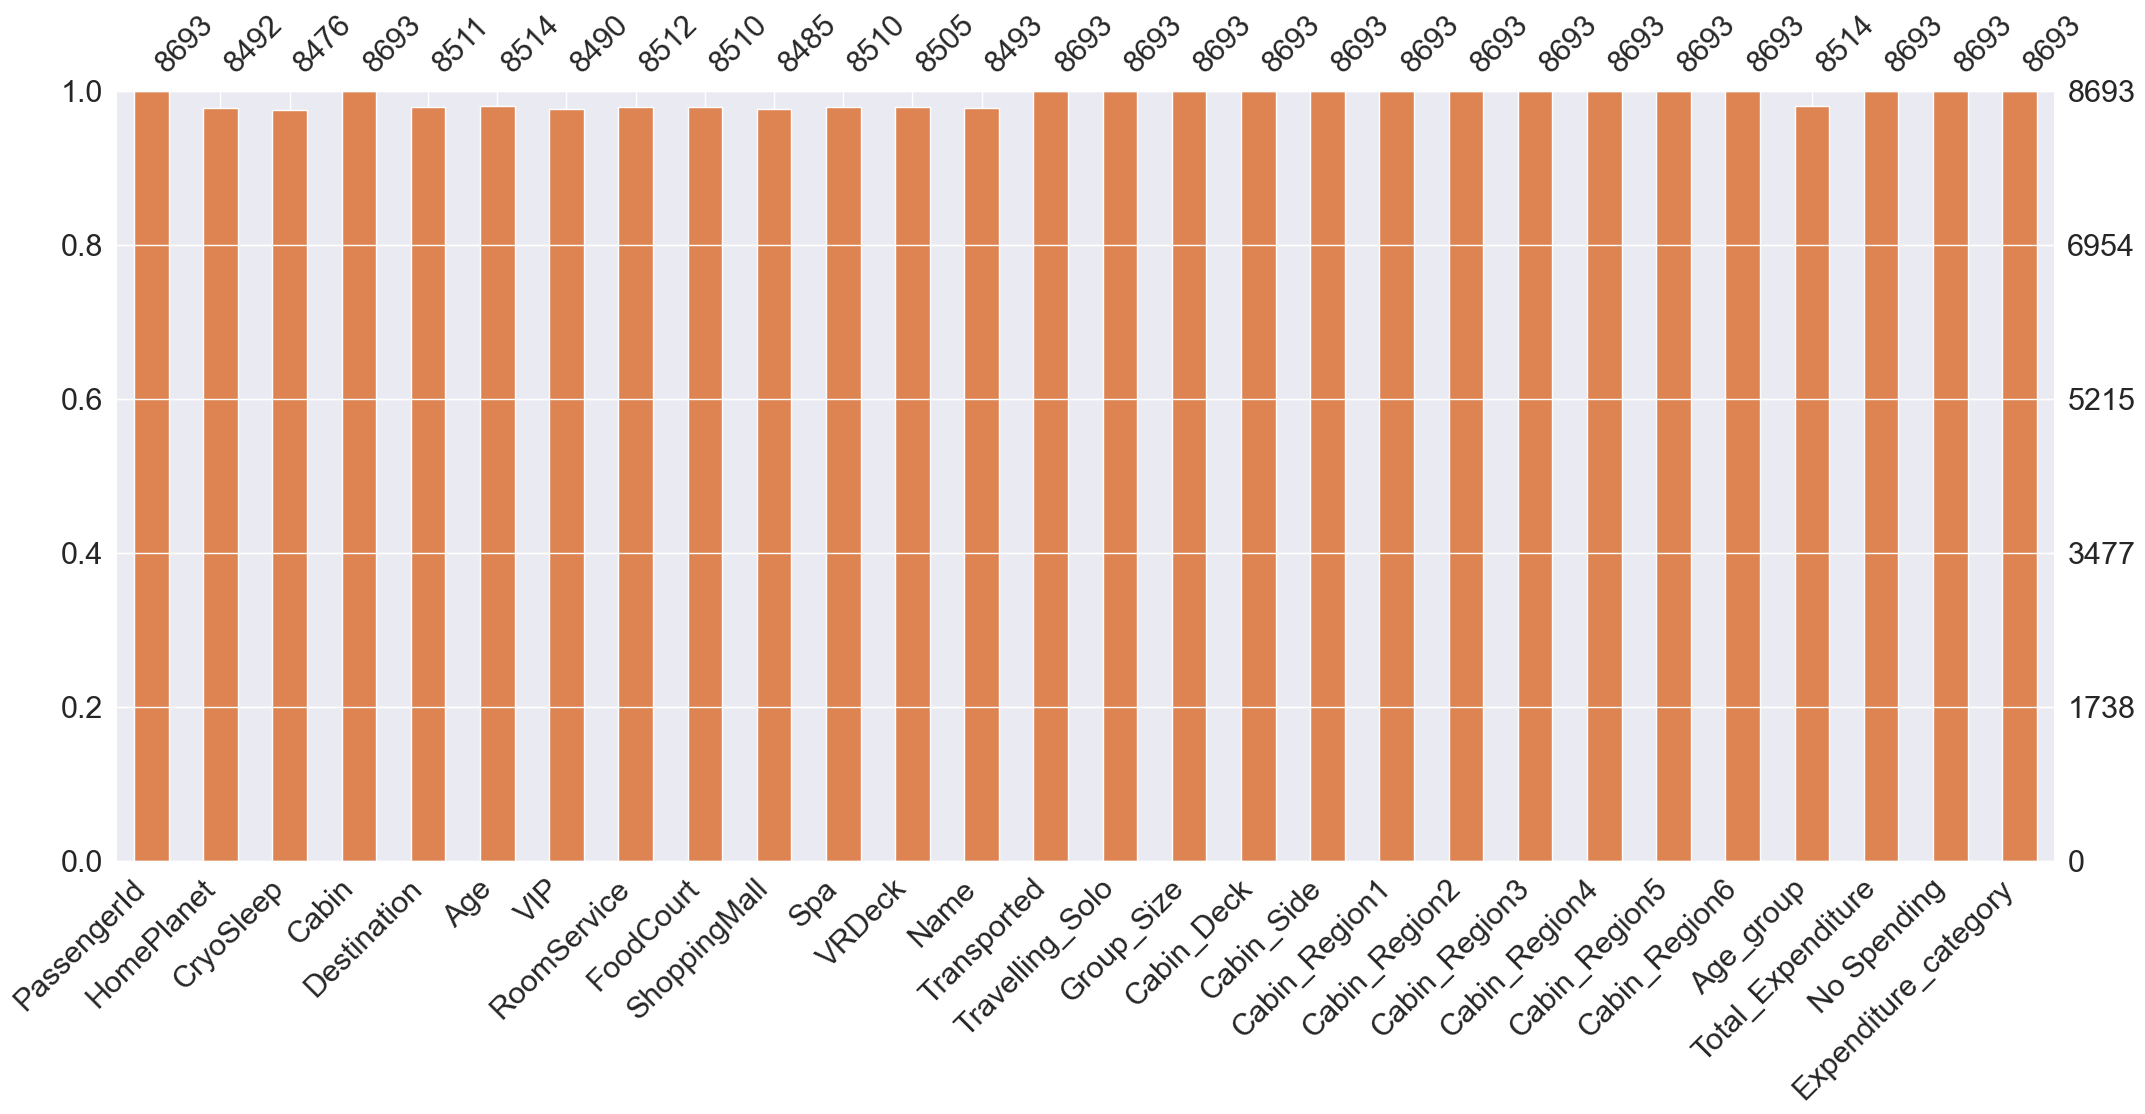

In [226]:
msno.bar(train_df,color='C1',fontsize=22)
plt.show()

In [227]:
#Handling Missing Values
cat_cols=train_df.select_dtypes(include=["object","bool"]).columns.tolist()
num_cols=train_df.select_dtypes(include=["int","float"]).columns.tolist()


In [228]:
print(cat_cols)
print("************************************************************************")
print(num_cols)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age_group', 'No Spending', 'Expenditure_category']
************************************************************************
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total_Expenditure']


In [229]:
cat_cols.remove("Transported")

In [230]:
imputer1=SimpleImputer(strategy="most_frequent")# for Categorical features
imputer2=SimpleImputer(strategy="median")# for numerical features

In [231]:
def fill_missingno(df):
    df[cat_cols]=imputer1.fit_transform(df[cat_cols])
    df[num_cols]=imputer2.fit_transform(df[num_cols])

In [232]:
fill_missingno(train_df)
fill_missingno(test_df)

In [233]:
print("Missing Values in training set",train_df.isnull().sum().sum())
print("Missing Values in test set ",test_df.isnull().sum().sum())

Missing Values in training set 0
Missing Values in test set  0


In [234]:
#Duplicated Values in Training and Test Set
print("Duplicated Values in training set",train_df.duplicated().sum().sum())
print("Duplicated Values in test set ",test_df.duplicated().sum().sum())

Duplicated Values in training set 0
Duplicated Values in test set  0


In [235]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age_group                  6
No Spending                2
Expenditure_category       4
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side               

In [236]:
pass_df=test_df[["PassengerId"]]

In [237]:
cols_to_be_removed=["PassengerId","Name","Cabin"]
train_df.drop(columns=cols_to_be_removed,inplace=True)
test_df.drop(columns=cols_to_be_removed,inplace=True)

In [238]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total_Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


In [239]:
cols_expenditure=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Expenditure']
for value in cols_expenditure:
    train_df[value]=np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

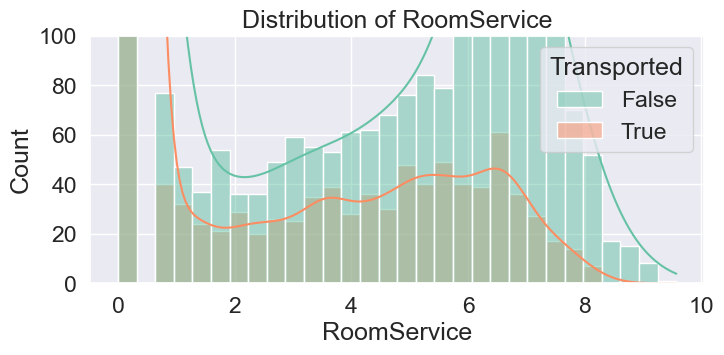

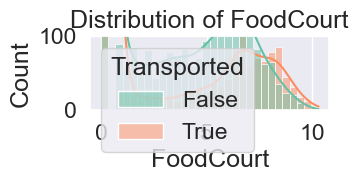

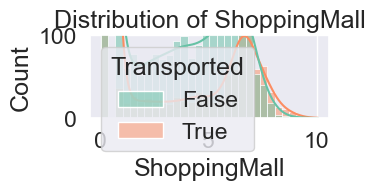

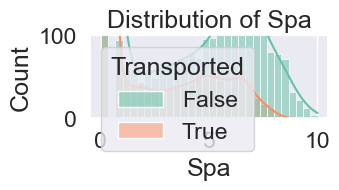

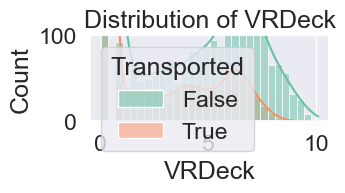

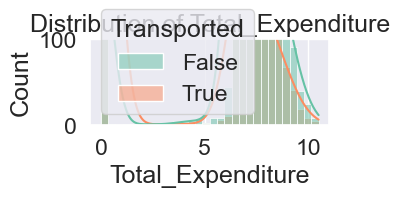

In [240]:
exp_cols1=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck","Total_Expenditure"]
plt.figure(figsize = (14,10))
for idx, column in enumerate(exp_cols1):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column,data=train_df,kde=True,hue="Transported",bins=30,palette="Set2")
    plt.title(f"Distribution of {column}")
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()

In [241]:
bool_to_be_converted=['CryoSleep','VIP','Travelling_Solo','Cabin_Region1','Cabin_Region2','Cabin_Region3','Cabin_Region4','Cabin_Region5','Cabin_Region6','No Spending']
train_df[bool_to_be_converted]=train_df[bool_to_be_converted].astype(bool)
test_df[bool_to_be_converted]=test_df[bool_to_be_converted].astype(bool)

In [242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   bool   
 2   Destination           8693 non-null   object 
 3   Age                   8693 non-null   float64
 4   VIP                   8693 non-null   bool   
 5   RoomService           8693 non-null   float64
 6   FoodCourt             8693 non-null   float64
 7   ShoppingMall          8693 non-null   float64
 8   Spa                   8693 non-null   float64
 9   VRDeck                8693 non-null   float64
 10  Transported           8693 non-null   bool   
 11  Travelling_Solo       8693 non-null   bool   
 12  Group_Size            8693 non-null   float64
 13  Cabin_Deck            8693 non-null   object 
 14  Cabin_Side            8693 non-null   object 
 15  Cabin_Region1        

In [243]:
train_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age_group,Total_Expenditure,No Spending,Expenditure_category
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,1.0,B,P,True,False,False,False,False,False,Age_33-50,0.0,True,No Expense


In [244]:
#Feature Encoding
#One Hot Encoding for Categorical
#Label for Ordinal
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols=["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","No Spending","Age_group","Expenditure_category"]


In [245]:
enc=LabelEncoder()
train_df[ordinal_cat_cols]=train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols]=test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [246]:
train_df=pd.get_dummies(train_df,columns=nominal_cat_cols,dtype=int)
test_df=pd.get_dummies(test_df,columns=nominal_cat_cols,dtype=int)

In [247]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

In [248]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age_group,Total_Expenditure,No Spending,Expenditure_category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,0,1,0,0,0,1
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,1,0,0,0,0,1
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,0,1,0,0,0,1
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,0,1,0,0,0,1
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,1,0,0,0,0,1


In [249]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age_group,Total_Expenditure,No Spending,Expenditure_category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,6,1,1,0,0,0,0,0,3,0.000000,1,3,1,0,0,0,0,1
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,7.949091,0,0,1,0,0,0,0,1
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,2,1,1,0,0,0,0,0,3,0.000000,1,3,0,1,0,1,0,0
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,6.37332,1,1.0,2,1,1,0,0,0,0,0,4,8.911800,0,0,0,1,0,0,0,1
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,6.470800,0,1,1,0,0,0,0,1


In [250]:
#Selecting Features and Labels for Model Training
X=train_df.drop(columns=["Transported"])
y=train_df["Transported"]

In [251]:
#Feature Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
test_df_scaled=scaler.transform(test_df)

In [252]:
print(X_scaled)

[[-0.73277002  0.71194537 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 [-0.73277002 -0.33403748 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 [-0.73277002  2.03685698  6.53325471 ... -0.51101319 -0.31748665
   0.65252063]
 ...
 [-0.73277002 -0.1945731  -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]
 [-0.73277002  0.22382004 -0.15306307 ...  1.95689664 -0.31748665
  -1.5325186 ]
 [-0.73277002  1.06060632 -0.15306307 ... -0.51101319 -0.31748665
   0.65252063]]


In [253]:
#Splitting data which does not require feature scaling
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [254]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6954, 28) (1739, 28) (6954,) (1739,)


In [255]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [256]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(6954, 28) (1739, 28) (6954,) (1739,)


Model Building for Scaled Data

In [257]:
training_score=[]
testing_score=[]

In [258]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1=model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a=accuracy_score(y_train1,x_train_pred1)*100
    b=accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    print(f"Accuracy Score of {model} training is",a)
    print(f"Accuracy Score of {model} testing is",b)
    print("\n","-"*50)
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm=confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize = (14,10))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()



Accuracy Score of LogisticRegression() training is 77.85447224618925
Accuracy Score of LogisticRegression() testing is 77.11328349626221

 --------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7569892473118279
Recall Score of LogisticRegression() model is: 0.8036529680365296
F1 Score of LogisticRegression() model is: 0.7796234772978959

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


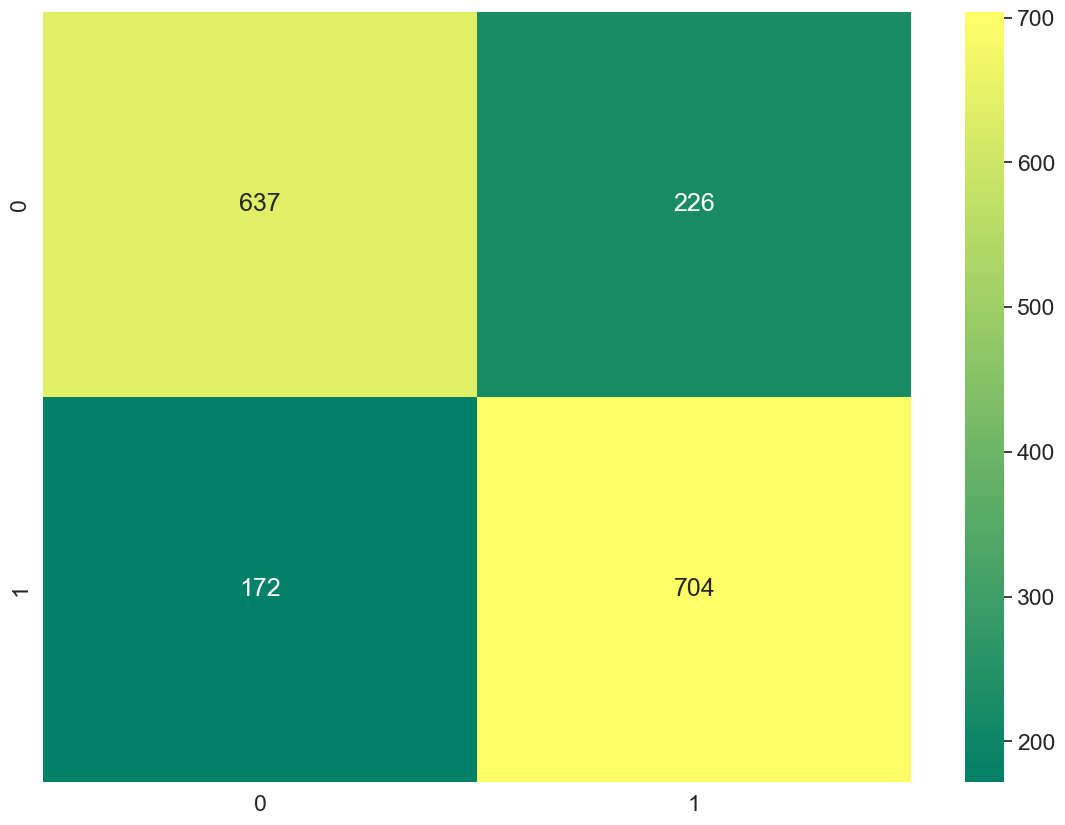

In [259]:
logreg=LogisticRegression()
model_prediction(logreg)

Accuracy Score of KNeighborsClassifier() training is 83.07448950244464
Accuracy Score of KNeighborsClassifier() testing is 75.44565842438183

 --------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7701564380264742
Recall Score of KNeighborsClassifier() model is: 0.730593607305936
F1 Score of KNeighborsClassifier() model is: 0.7498535442296427

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


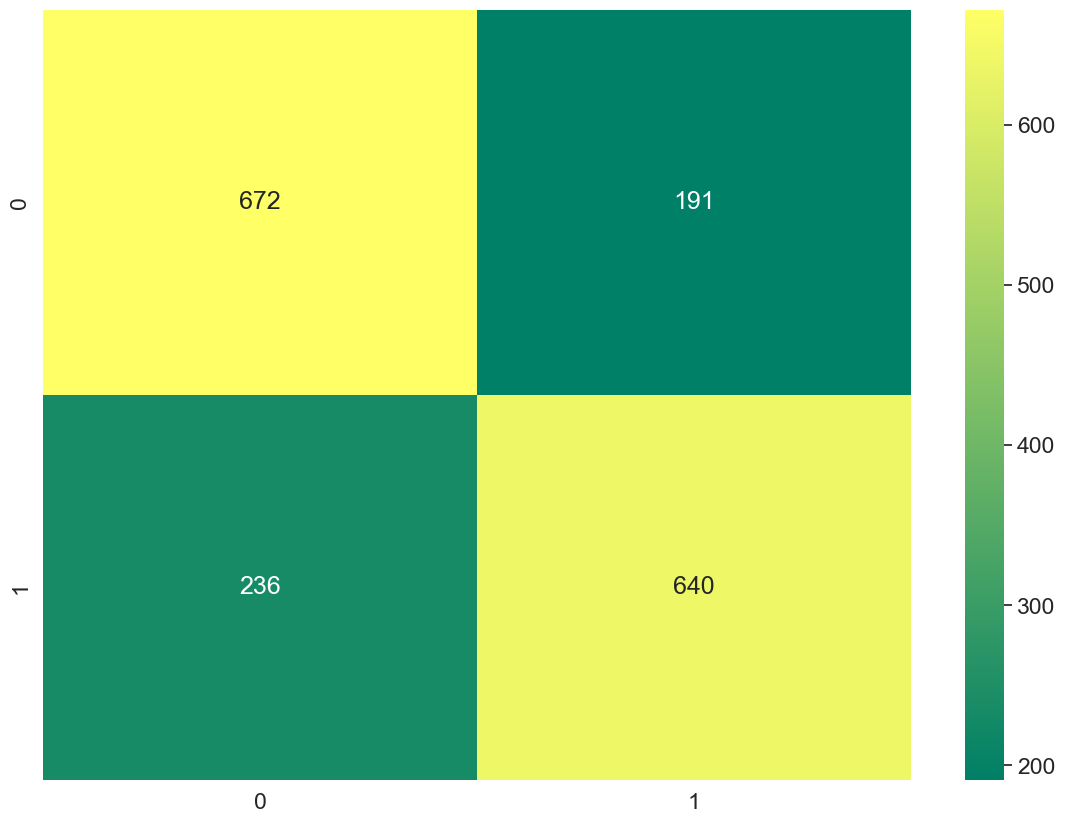

In [260]:
knn=KNeighborsClassifier()
model_prediction(knn)

Accuracy Score of GaussianNB() training is 73.94305435720449
Accuracy Score of GaussianNB() testing is 73.3755031627372

 --------------------------------------------------
Precision Score of GaussianNB() model is: 0.7779273216689099
Recall Score of GaussianNB() model is: 0.6598173515981736
F1 Score of GaussianNB() model is: 0.7140210006176653

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


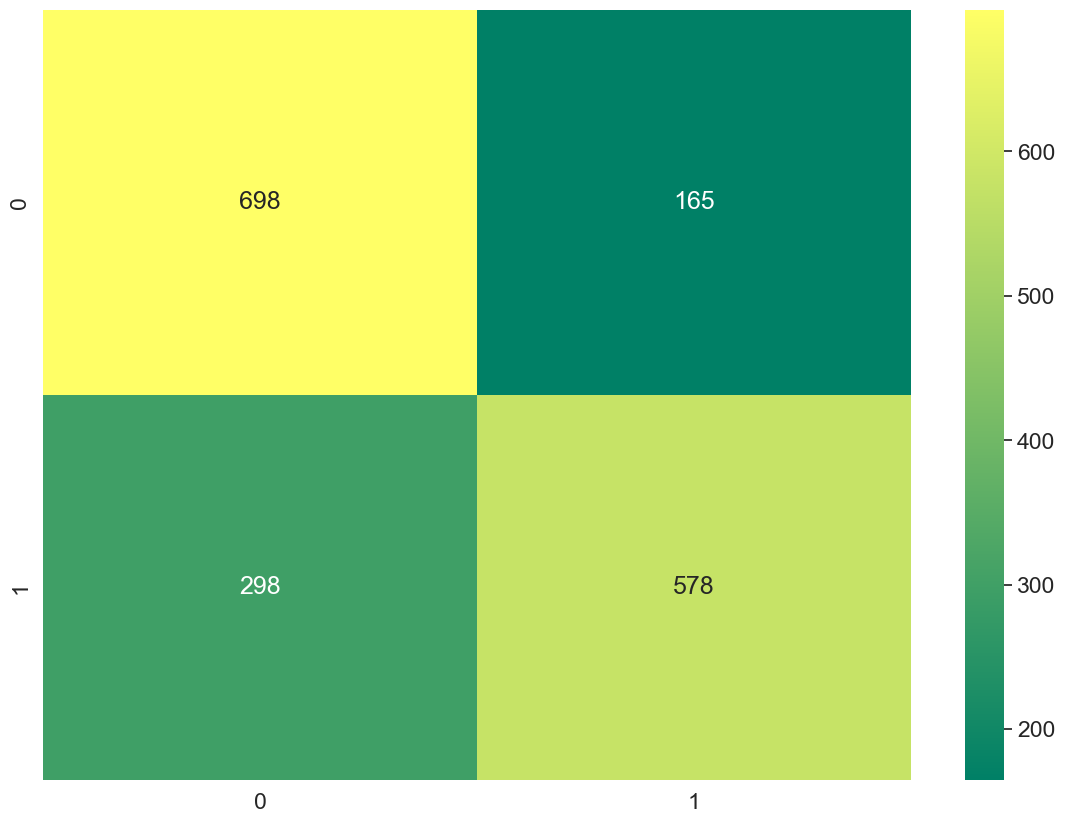

In [261]:
nb=GaussianNB()
model_prediction(nb)

Accuracy Score of SVC() training is 81.8234109864826
Accuracy Score of SVC() testing is 79.700977573318

 --------------------------------------------------
Precision Score of SVC() model is: 0.7995418098510882
Recall Score of SVC() model is: 0.7968036529680366
F1 Score of SVC() model is: 0.7981703830760435

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


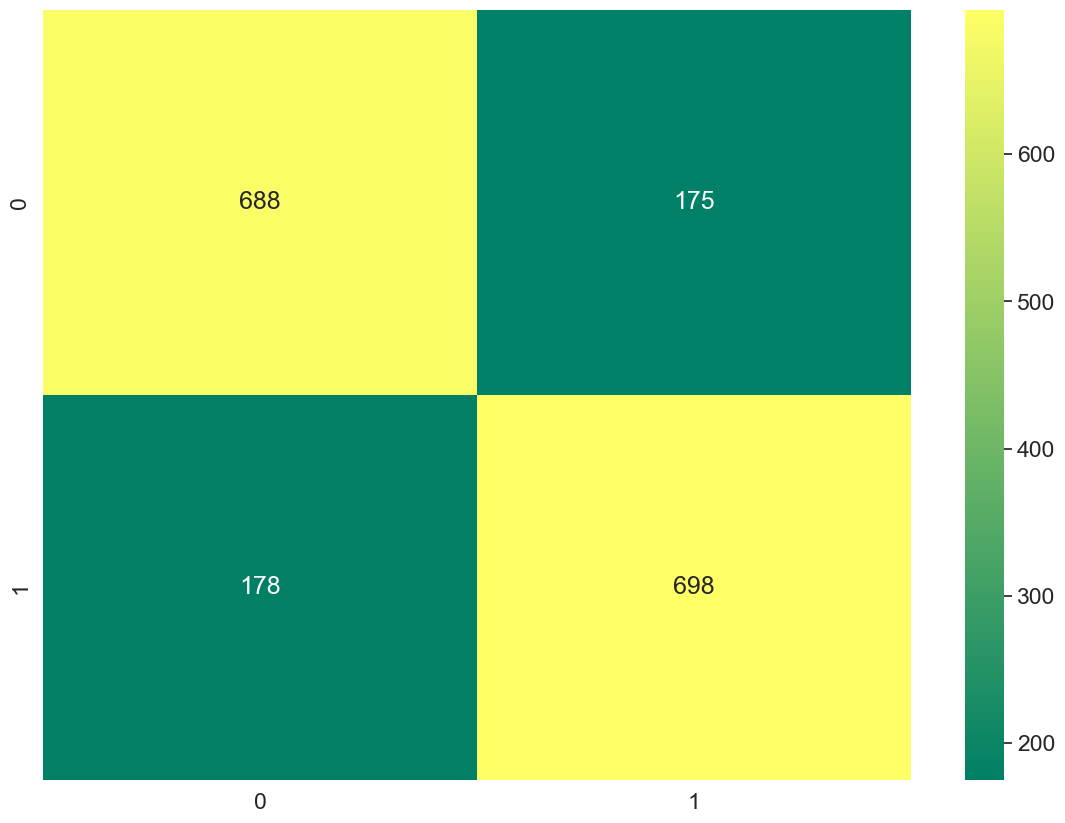

In [262]:
svc=SVC()
model_prediction(svc)

In [263]:
#Model Building for Unscaled Data
def model_prediction_unscaled(model):
    model.fit(x_train,y_train)
    x_train_pred=model.predict(x_train)
    x_test_pred=model.predict(x_test)
    a=accuracy_score(y_train,x_train_pred)*100
    b=accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    print(f"Accuracy Score of {model} training is",a)
    print(f"Accuracy Score of {model} testing is",b)
    print("\n","-"*50)
    print(f"Precision score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"f1 score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n","-"*50)
    print(f"Confusion Matrix of {model} model is:")
    cm=confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize = (14,10))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()






Accuracy Score of DecisionTreeClassifier() training is 98.66264020707507
Accuracy Score of DecisionTreeClassifier() testing is 75.50316273720529

 --------------------------------------------------
Precision score of DecisionTreeClassifier() model is: 0.7539325842696629
Recall score of DecisionTreeClassifier() model is: 0.7642369020501139
f1 score of DecisionTreeClassifier() model is: 0.7590497737556561

 --------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


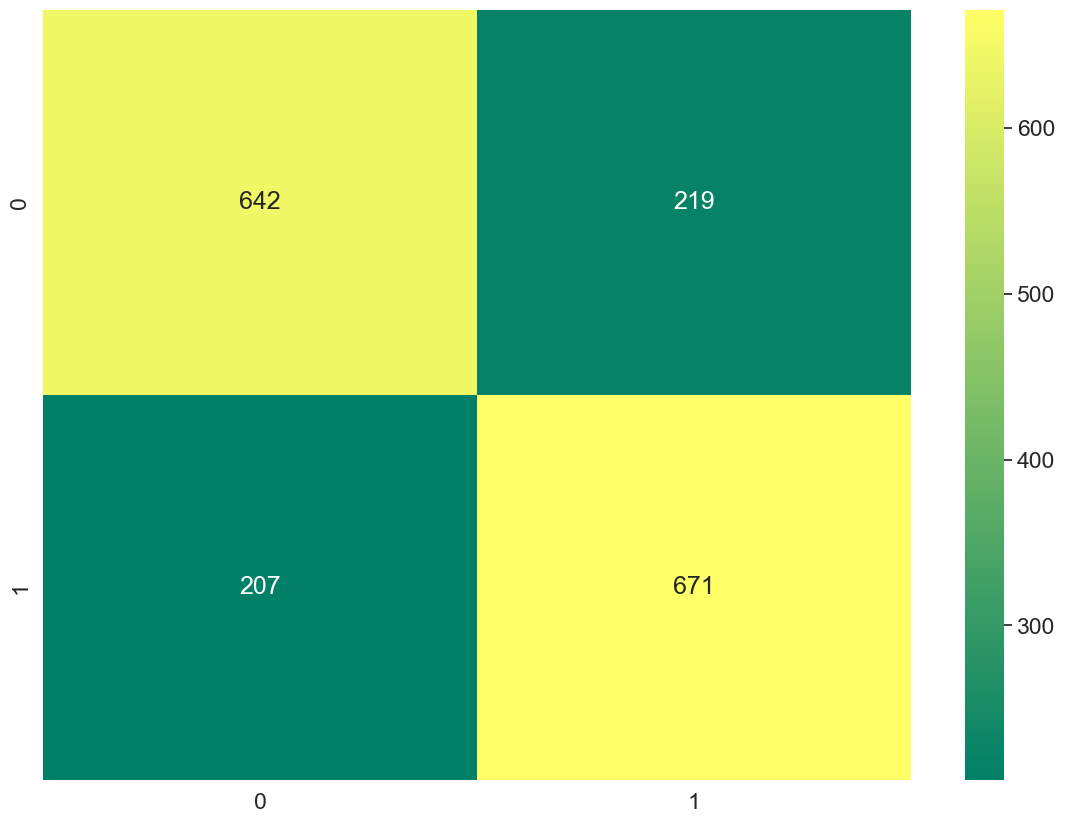

In [264]:
dt=DecisionTreeClassifier()
model_prediction_unscaled(dt)

Accuracy Score of RandomForestClassifier() training is 98.66264020707507
Accuracy Score of RandomForestClassifier() testing is 79.41345600920069

 --------------------------------------------------
Precision score of RandomForestClassifier() model is: 0.8044496487119438
Recall score of RandomForestClassifier() model is: 0.7824601366742597
f1 score of RandomForestClassifier() model is: 0.7933025404157044

 --------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


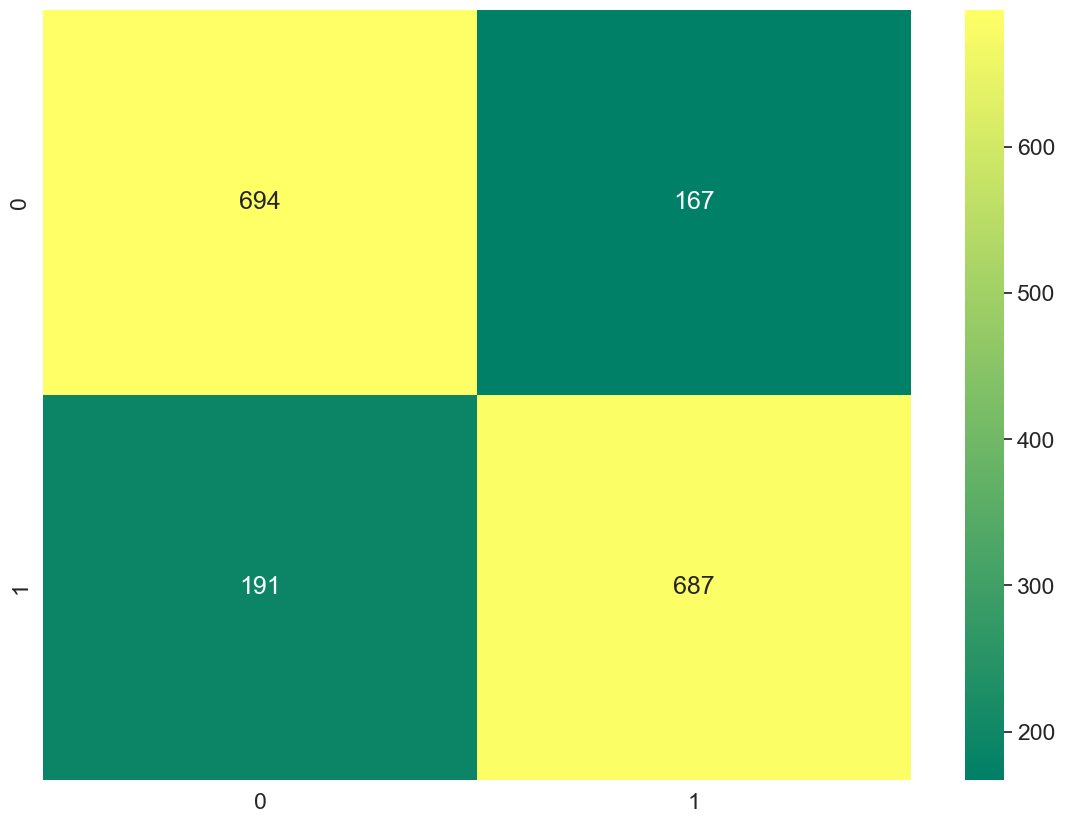

In [265]:
rf=RandomForestClassifier()
model_prediction_unscaled(rf)

Accuracy Score of <catboost.core.CatBoostClassifier object at 0x00000295057F2AE0> training is 88.05004314063848
Accuracy Score of <catboost.core.CatBoostClassifier object at 0x00000295057F2AE0> testing is 80.33352501437608

 --------------------------------------------------
Precision score of <catboost.core.CatBoostClassifier object at 0x00000295057F2AE0> model is: 0.793859649122807
Recall score of <catboost.core.CatBoostClassifier object at 0x00000295057F2AE0> model is: 0.8246013667425968
f1 score of <catboost.core.CatBoostClassifier object at 0x00000295057F2AE0> model is: 0.8089385474860336

 --------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x00000295057F2AE0> model is:


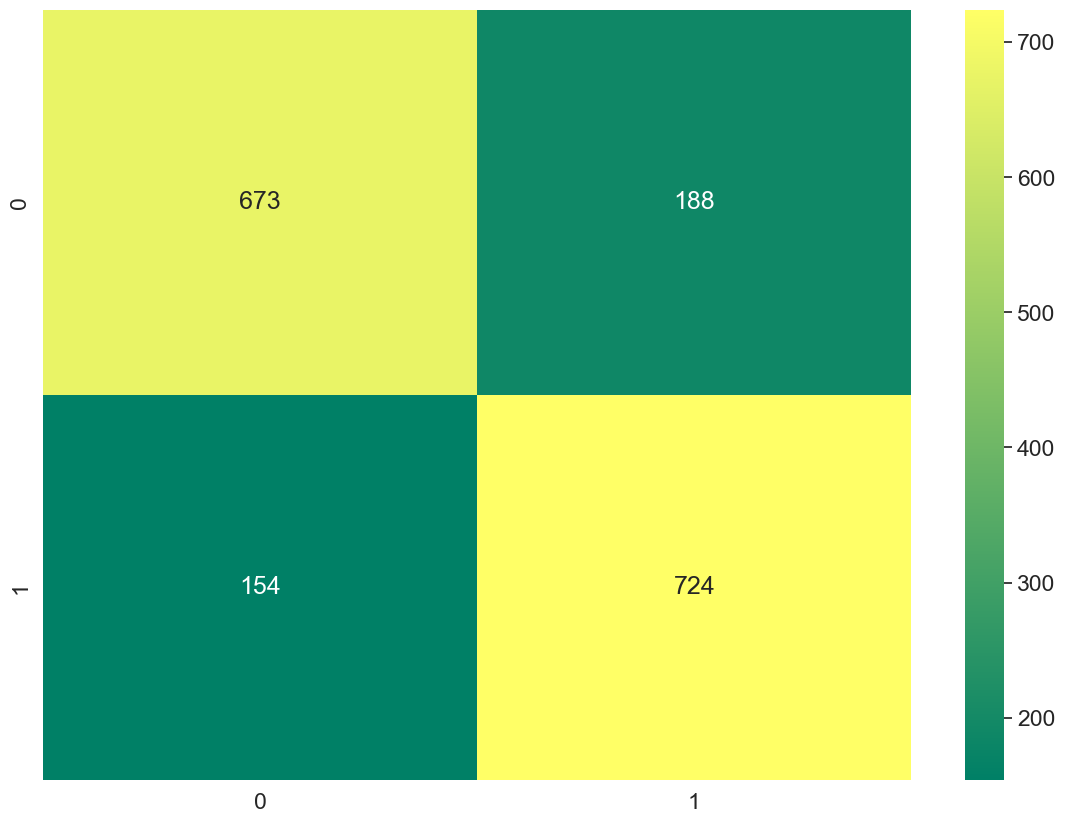

In [266]:
model_prediction_unscaled(CatBoostClassifier(verbose=False))

Accuracy Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) training is 92.42162784009203
Accuracy Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

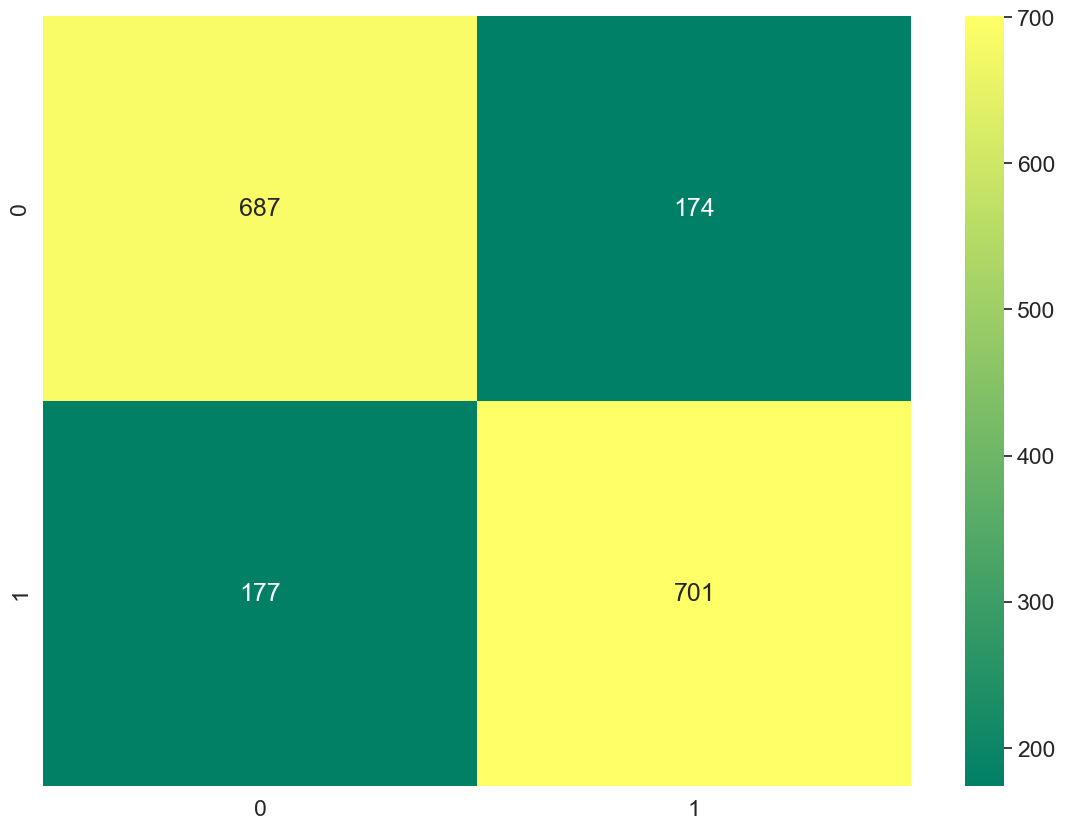

In [267]:
model_prediction_unscaled(XGBClassifier())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1669
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Accuracy Score of LGBMClassifier() training is 88.78343399482313
Accuracy Score of LGBMClassifier() testing is 80.21851638872916

 --------------------------------------------------
Precision score of LGBMClassifier() model is: 0.7940528634361234
Recall score of LGBMClassifier() model is: 0.8211845102505695
f1 score of LGBMClassifier() model is: 0.8073908174692049


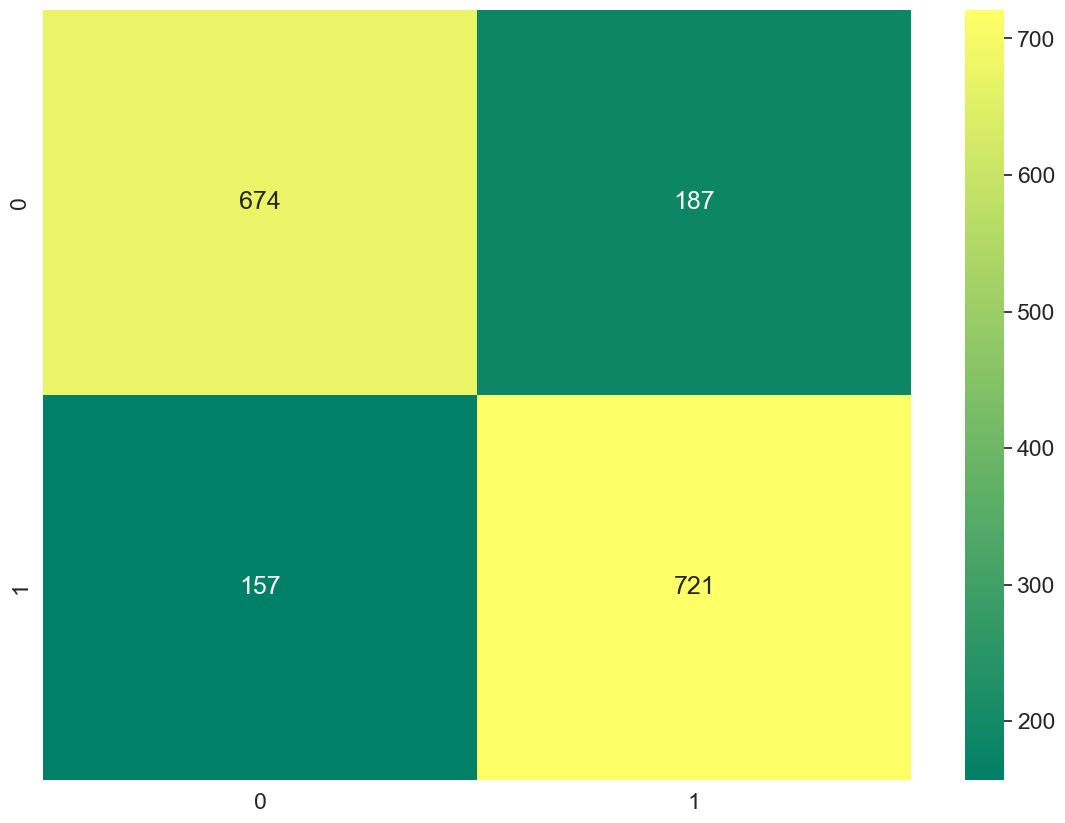

In [268]:
model_prediction_unscaled(LGBMClassifier())

In [269]:
#All Model Comparision
models=["Logistic Regression","KNN","Naive Bayes","SVC","Decision Tree","Random Forest","CatBoost","XGBoost","LGBMClassifier"]
df=pd.DataFrame({"Algorithms":models,"Training Score":training_score,"Test Score":testing_score})

In [270]:
df

,Algorithms,Training Score,Test Score
0,Logistic Regression,77.854472,77.113283
1,KNN,83.074490,75.445658
2,Naive Bayes,73.943054,73.375503
3,SVC,81.823411,79.700978
4,Decision Tree,98.662640,75.503163
5,Random Forest,98.662640,79.413456
6,CatBoost,88.050043,80.333525
7,XGBoost,92.421628,79.815986
8,LGBMClassifier,88.783434,80.218516


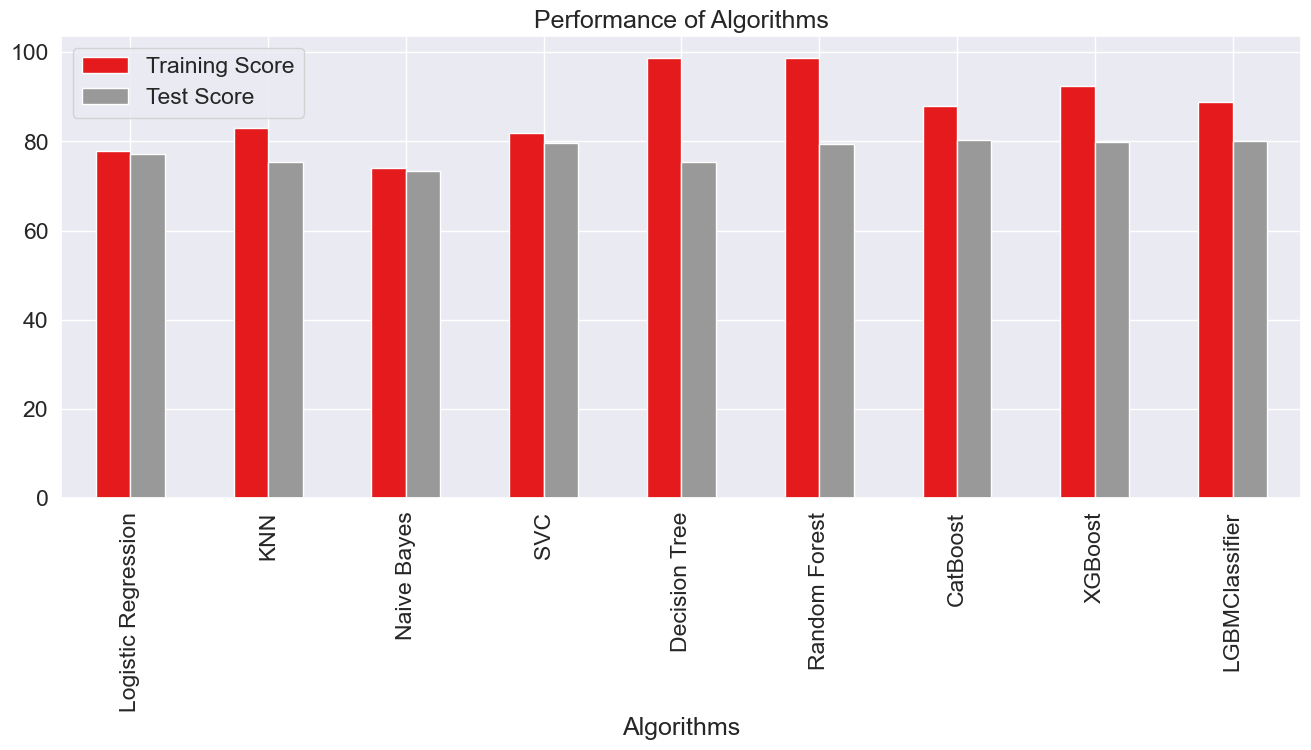

In [271]:
df.plot(x="Algorithms",y=["Training Score","Test Score"],figsize=(16,6),kind="bar",title="Performance of Algorithms",colormap="Set1")
plt.show()


In [ ]:
#Alogrithms Selected are LGBM,XGBoost,CatBoost and RandomForest

Hyperparameter Tuning